In [30]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('ALLerrordataset.csv')
df.head()

,statuscode,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,cachecontrol,...,devicebrand,host,method,manifest,assetnumber,hit,@version,cachename,popname,uid
0,404,NaN,HTTP/1.1,0.000000,0.069129,0.069188,NaN,0.0,3815.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
1,404,NaN,HTTP/1.1,0.000000,0.077291,0.077333,NaN,0.0,3320.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
2,404,application/octet-stream,HTTP/1.1,0.206349,0.049394,0.049450,3600.0,0.0,4170.0,Cache-Control:max-age=3600,...,NaN,13.0,GET,False,NaN,miss,1,0,0,NaN
3,404,NaN,HTTP/1.1,0.000000,0.069060,0.069112,NaN,3.0,4518.0,Cache-Control:,...,1.0,0.0,GET,False,NaN,miss,1,0,0,NaN
4,404,NaN,HTTP/1.1,0.000000,0.104557,0.104600,NaN,0.0,4727.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN


In [63]:
df=df.drop(labels=["fragment","manifest","hit","@version","popname"],axis=1)

In [64]:
df=df.drop(labels=["timefirstbyte","contentlength","timetoserv","maxage","sid"],axis=1)

In [65]:
df=df.drop(labels=["path","uid"],axis=1)

In [66]:
df=df.drop(labels=["contentpackage","devicemodel","devicebrand", "assetnumber"],axis=1)

In [67]:
df=df.drop(labels=["protocol","osfamily", "coordinates"],axis=1)

In [9]:
df_livetv = df[df['host'] == 7]

In [10]:
df_livetv=df_livetv.drop(labels=["cachecontrol"],axis=1)

In [11]:
df_livetv=df_livetv.drop(labels=["uamajor"],axis=1)

In [12]:
df_livetv=df_livetv.drop(labels=["devicefamily","host","method", "cachename"],axis=1)

In [13]:
df_livetv.head()

,statuscode,contenttype,uafamily,@timestamp,livechannel
70,400,text/html; charset=utf-8,12.0,2088-05-13T07:18:16.000Z,NaN
73,400,text/html; charset=utf-8,12.0,2088-05-13T07:25:04.000Z,NaN
74,400,text/html; charset=utf-8,12.0,2088-05-13T07:54:31.000Z,NaN
75,400,text/html; charset=utf-8,12.0,2088-05-13T08:27:31.000Z,NaN
79,412,text/html,12.0,2088-05-13T16:42:10.000Z,60.0


In [14]:
df_jii = df_livetv['@timestamp']  

In [15]:
from datetime import datetime
format_data = "%Y-%m-%dT%H:%M:%S.%fZ"
gh=[]
ml=[]
for i in df_jii:
    date = datetime.strptime(i, format_data)
    gh.append(date.hour)
    ml.append(date.minute)

In [16]:
df_livetv['hour'] = gh

In [37]:
df_livetv=df_livetv.drop(labels=["@timestamp"],axis=1)

In [38]:
km = df_livetv.copy()

In [39]:
km1 = df_livetv.copy()

In [40]:
km.head()

,statuscode,contenttype,uafamily,livechannel,hour
70,400,text/html; charset=utf-8,12.0,NaN,7
73,400,text/html; charset=utf-8,12.0,NaN,7
74,400,text/html; charset=utf-8,12.0,NaN,7
75,400,text/html; charset=utf-8,12.0,NaN,8
79,412,text/html,12.0,60.0,16


In [41]:
km['uafamily']=km['uafamily'].fillna(km['uafamily'].mode()[0])
km['contenttype']=km['contenttype'].fillna(km['contenttype'].mode()[0])
km['livechannel']=km['livechannel'].fillna(km['livechannel'].mode()[0])

In [42]:
km1['uafamily']=km1['uafamily'].fillna(km1['uafamily'].mode()[0])
km1['contenttype']=km1['contenttype'].fillna(km1['contenttype'].mode()[0])
km1['livechannel']=km1['livechannel'].fillna(km1['livechannel'].mode()[0])

In [43]:
km1.drop_duplicates(subset=None, keep='first', inplace=True)

In [44]:
km.drop_duplicates(subset=None, keep='first', inplace=True)

In [45]:
km.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 70 to 283104
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   105 non-null    int64  
 1   contenttype  105 non-null    object 
 2   uafamily     105 non-null    float64
 3   livechannel  105 non-null    float64
 4   hour         105 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.9+ KB


In [26]:
!pip install gower
!pip install scikit-learn-extra

In [46]:
import gower
from sklearn_extra.cluster import KMedoids
gower_mat = gower.gower_matrix(km)

In [51]:
from sklearn.cluster import DBSCAN
dbscan_cluster = DBSCAN(eps=0.259, min_samples=15, metric="minkowski", p=2,metric_params={"w":np.ones(len(gower_mat))})
dbscan_cluster.fit(gower_mat_1)
labels=dbscan_cluster.labels_

In [52]:
dbscan_score = DBCV(gower_mat, labels)
print(dbscan_score)

0.13764608211128243


In [70]:
gower_mat = gower.gower_matrix(km)

In [30]:
%pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [31]:
%pip install numpy
%pip install seaborn
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Text(0, 0.5, 'Distance')

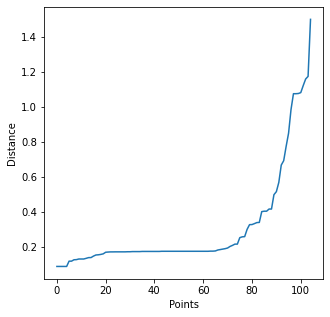

In [120]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(gower_mat)

distances, indices = neighbors.kneighbors(gower_mat)
distances = np.sort(distances[:,4], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.25927046


<Figure size 360x360 with 0 Axes>

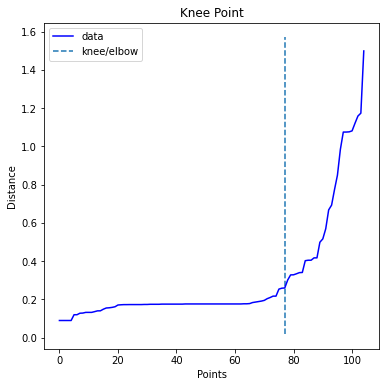

In [121]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [173]:
range_min = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 
for i in range_min:
    dbscan_cluster = DBSCAN(eps=0.259, min_samples=i, metric="minkowski", p=2,metric_params={"w":np.ones(len(gower_mat))})
    dbscan_cluster.fit(gower_mat)
    # Number of Clusters
    print('For minimum samples: %d' % i)
    labels=dbscan_cluster.labels_
    N_clus=len(set(labels))-(1 if -1 in labels else 0)
    print('Estimated no. of clusters: %d' % N_clus)
    # Identify Noise
    n_noise = list(dbscan_cluster.labels_).count(-1)

For minimum samples: 10
Estimated no. of clusters: 2
Estimated no. of noise points: 30
For minimum samples: 11
Estimated no. of clusters: 3
Estimated no. of noise points: 31
For minimum samples: 12
Estimated no. of clusters: 3
Estimated no. of noise points: 41
For minimum samples: 13
Estimated no. of clusters: 3
Estimated no. of noise points: 42
For minimum samples: 14
Estimated no. of clusters: 3
Estimated no. of noise points: 67
For minimum samples: 15
Estimated no. of clusters: 2
Estimated no. of noise points: 86
For minimum samples: 16
Estimated no. of clusters: 2
Estimated no. of noise points: 88
For minimum samples: 17
Estimated no. of clusters: 1
Estimated no. of noise points: 104
For minimum samples: 18
Estimated no. of clusters: 1
Estimated no. of noise points: 104
For minimum samples: 19
Estimated no. of clusters: 1
Estimated no. of noise points: 104
For minimum samples: 20
Estimated no. of clusters: 1
Estimated no. of noise points: 104


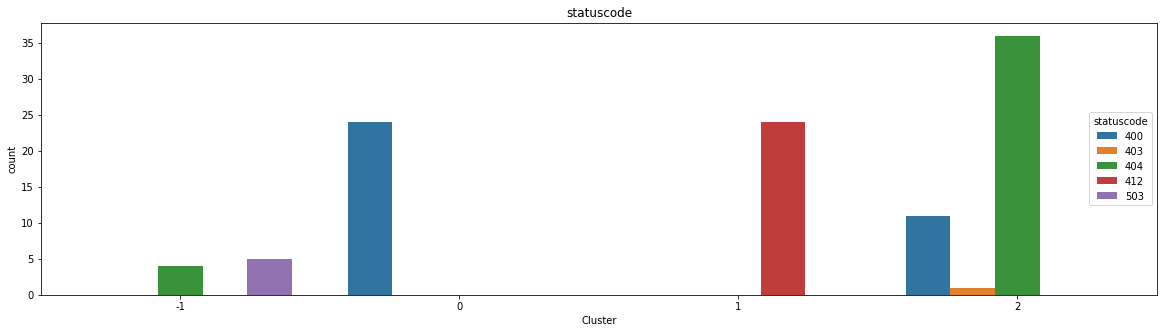

In [127]:
dbscan_cluster = DBSCAN(eps=0.259, min_samples=11, metric="minkowski", p=2,metric_params={"w":np.ones(len(gower_mat))})
dbscan_cluster.fit(gower_mat)
labels=dbscan_cluster.labels_
km["Cluster"] = labels
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="statuscode", data = km)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.show()

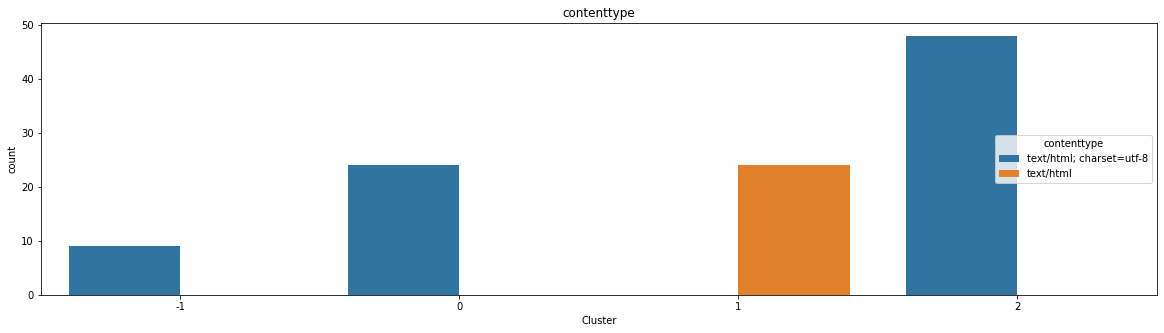

In [128]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="contenttype", data = km)
ax.set_title('contenttype')
ax.legend(loc='right', title="contenttype")
plt.show()

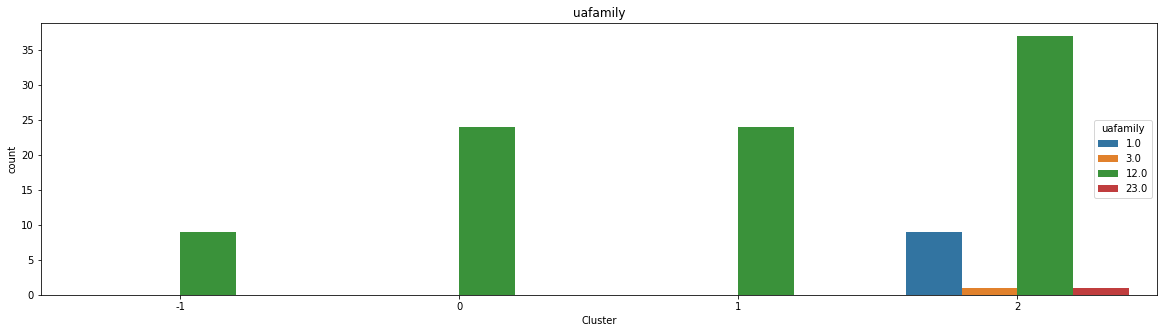

In [129]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="uafamily", data = km)
ax.set_title('uafamily')
ax.legend(loc='right', title="uafamily")
plt.show()

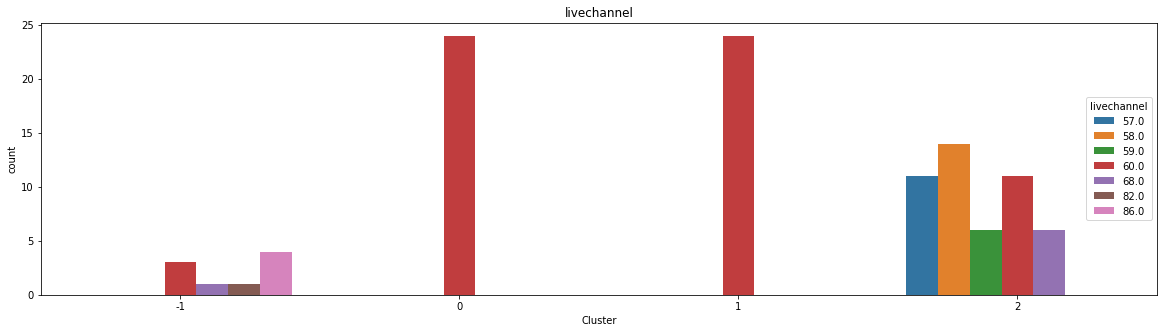

In [130]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="livechannel", data = km)
ax.set_title('livechannel')
ax.legend(loc='right', title="livechannel")
plt.show()

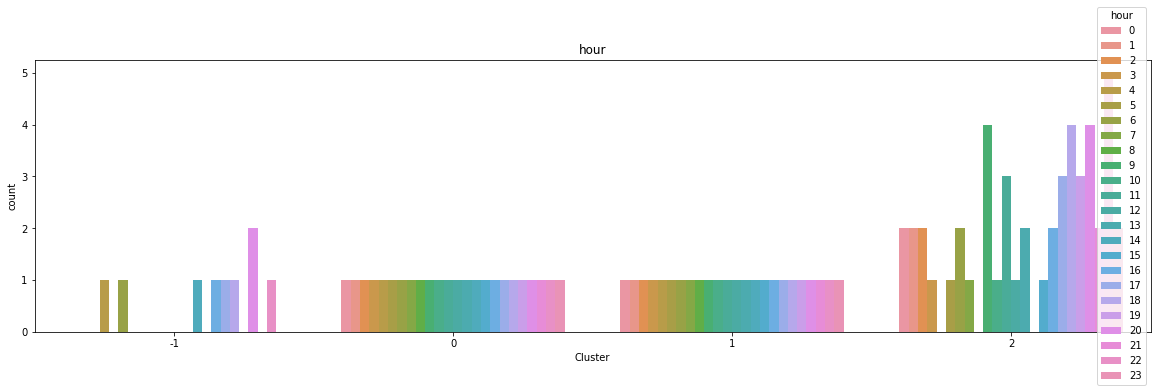

In [131]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="hour", data = km)
ax.set_title('hour')
ax.legend(loc='right', title="hour")
plt.show()

In [68]:
df_filecaching = df[df['host'] == 13]

In [69]:
df_filecaching.head()

,statuscode,contenttype,cachecontrol,uamajor,uafamily,devicefamily,@timestamp,livechannel,host,method,cachename
2,404,application/octet-stream,Cache-Control:max-age=3600,14.0,21.0,0.0,2088-05-13T09:39:05.000Z,NaN,13.0,GET,0
5,404,application/octet-stream,Cache-Control:max-age=3600,14.0,21.0,0.0,2088-05-13T10:33:59.000Z,NaN,13.0,GET,0
9,404,application/octet-stream,Cache-Control:max-age=3600,14.0,21.0,0.0,2088-05-13T16:41:05.000Z,NaN,13.0,GET,0
72,404,application/octet-stream,Cache-Control:max-age=3600,14.0,21.0,0.0,2088-05-13T08:22:29.000Z,NaN,13.0,GET,0
201,404,application/octet-stream,Cache-Control:max-age=3600,14.0,21.0,0.0,2088-05-13T21:05:00.000Z,NaN,13.0,GET,0


In [70]:
df_filecaching=df_filecaching.drop(labels=["livechannel"],axis=1)

In [71]:
df_filecaching=df_filecaching.drop(labels=["cachecontrol", "devicefamily", "host", "cachename"],axis=1)

In [72]:
df_filecaching=df_filecaching.drop(labels=["uamajor"],axis=1)

In [73]:
df_filecaching.head()

,statuscode,contenttype,uafamily,@timestamp,method
2,404,application/octet-stream,21.0,2088-05-13T09:39:05.000Z,GET
5,404,application/octet-stream,21.0,2088-05-13T10:33:59.000Z,GET
9,404,application/octet-stream,21.0,2088-05-13T16:41:05.000Z,GET
72,404,application/octet-stream,21.0,2088-05-13T08:22:29.000Z,GET
201,404,application/octet-stream,21.0,2088-05-13T21:05:00.000Z,GET


In [74]:
df_jiiiii = df_filecaching['@timestamp']  

In [75]:
from datetime import datetime
format_data = "%Y-%m-%dT%H:%M:%S.%fZ"
ph=[]
for i in df_jiiiii:
    date = datetime.strptime(i, format_data)
    ph.append(date.hour)

In [76]:
df_filecaching['hour'] = ph

In [77]:
df_filecaching.head()

,statuscode,contenttype,uafamily,@timestamp,method,hour
2,404,application/octet-stream,21.0,2088-05-13T09:39:05.000Z,GET,9
5,404,application/octet-stream,21.0,2088-05-13T10:33:59.000Z,GET,10
9,404,application/octet-stream,21.0,2088-05-13T16:41:05.000Z,GET,16
72,404,application/octet-stream,21.0,2088-05-13T08:22:29.000Z,GET,8
201,404,application/octet-stream,21.0,2088-05-13T21:05:00.000Z,GET,21


In [78]:
df_filecaching=df_filecaching.drop(labels=["@timestamp"],axis=1)

In [79]:
lll1 = df_filecaching.copy()

In [80]:
lll2 = df_filecaching.copy()

In [81]:
lll1=lll1.drop(labels=["hour"],axis=1)

In [82]:
lll1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11658 entries, 2 to 286976
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   11658 non-null  int64  
 1   contenttype  11658 non-null  object 
 2   uafamily     11658 non-null  float64
 3   method       11658 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 455.4+ KB


In [83]:
lll2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11658 entries, 2 to 286976
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   11658 non-null  int64  
 1   contenttype  11658 non-null  object 
 2   uafamily     11658 non-null  float64
 3   method       11658 non-null  object 
 4   hour         11658 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 546.5+ KB


In [84]:
lll1.drop_duplicates(subset=None, keep='first', inplace=True)

In [85]:
lll2.drop_duplicates(subset=None, keep='first', inplace=True)

In [86]:
lll1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 2 to 98061
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   7 non-null      int64  
 1   contenttype  7 non-null      object 
 2   uafamily     7 non-null      float64
 3   method       7 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 280.0+ bytes


In [87]:
lll2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 2 to 202563
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   58 non-null     int64  
 1   contenttype  58 non-null     object 
 2   uafamily     58 non-null     float64
 3   method       58 non-null     object 
 4   hour         58 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ KB


In [88]:
gower_mat_111 = gower.gower_matrix(lll2)

In [90]:
dbscan_cluster = DBSCAN(eps=0.480, min_samples=15, metric="minkowski", p=2,metric_params={"w":np.ones(len(gower_mat_111))})
dbscan_cluster.fit(gower_mat_111)
labels=dbscan_cluster.labels_

In [94]:
dbscan_score = DBCV(gower_mat_111, labels)
print(dbscan_score)

0.6892356779653592


Text(0, 0.5, 'Distance')

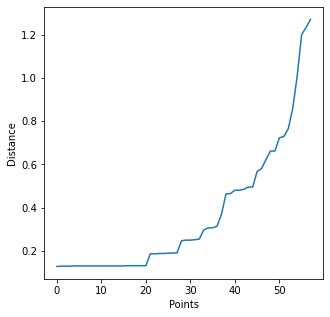

In [162]:
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(gower_mat_111)

distances, indices = neighbors.kneighbors(gower_mat_111)
distances = np.sort(distances[:,4], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.48039055


<Figure size 360x360 with 0 Axes>

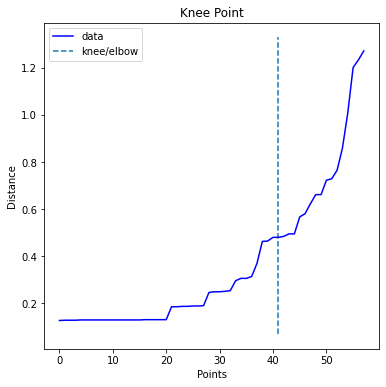

In [163]:
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Without Hour column:

In [195]:
range_min = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 
for i in range_min:
    dbscan_cluster = DBSCAN(eps=0.480, min_samples=i, metric="minkowski", p=2,metric_params={"w":np.ones(len(gower_mat_111))})
    dbscan_cluster.fit(gower_mat_111)
    # Number of Clusters
    print('For minimum samples: %d' % i)
    labels=dbscan_cluster.labels_
    N_clus=len(set(labels))-(1 if -1 in labels else 0)
    print('Estimated no. of clusters: %d' % N_clus)
    # Identify Noise
    n_noise = list(dbscan_cluster.labels_).count(-1)
    print('Estimated no. of noise points: %d' % n_noise)


For minimum samples: 10
Estimated no. of clusters: 4
Estimated no. of noise points: 14
For minimum samples: 11
Estimated no. of clusters: 4
Estimated no. of noise points: 14
For minimum samples: 12
Estimated no. of clusters: 4
Estimated no. of noise points: 14
For minimum samples: 13
Estimated no. of clusters: 4
Estimated no. of noise points: 14
For minimum samples: 14
Estimated no. of clusters: 4
Estimated no. of noise points: 14
For minimum samples: 15
Estimated no. of clusters: 4
Estimated no. of noise points: 14
For minimum samples: 16
Estimated no. of clusters: 4
Estimated no. of noise points: 14
For minimum samples: 17
Estimated no. of clusters: 4
Estimated no. of noise points: 14
For minimum samples: 18
Estimated no. of clusters: 4
Estimated no. of noise points: 14
For minimum samples: 19
Estimated no. of clusters: 4
Estimated no. of noise points: 14
For minimum samples: 20
Estimated no. of clusters: 4
Estimated no. of noise points: 14


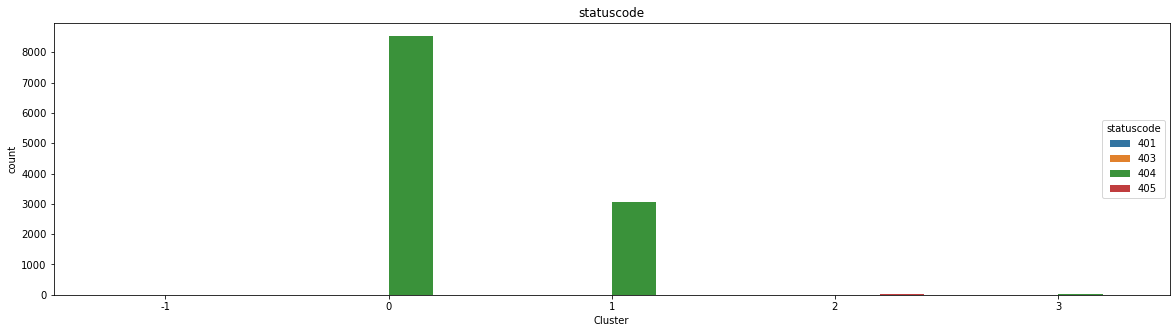

In [197]:
dbscan_cluster = DBSCAN(eps=0.480, min_samples=11, metric="minkowski", p=2,metric_params={"w":np.ones(len(gower_mat_111))})
dbscan_cluster.fit(gower_mat_111)
labels=dbscan_cluster.labels_
lll1["Cluster"] = labels
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="statuscode", data = lll1)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.show()

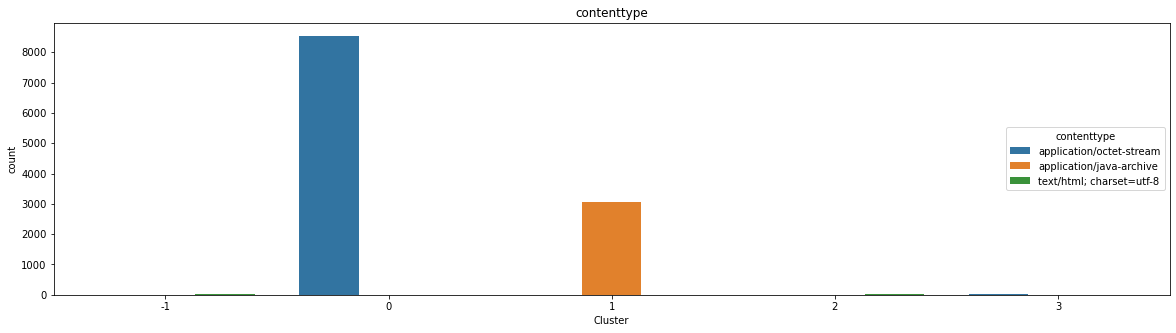

In [198]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="contenttype", data = lll1)
ax.set_title('contenttype')
ax.legend(loc='right', title="contenttype")
plt.show()

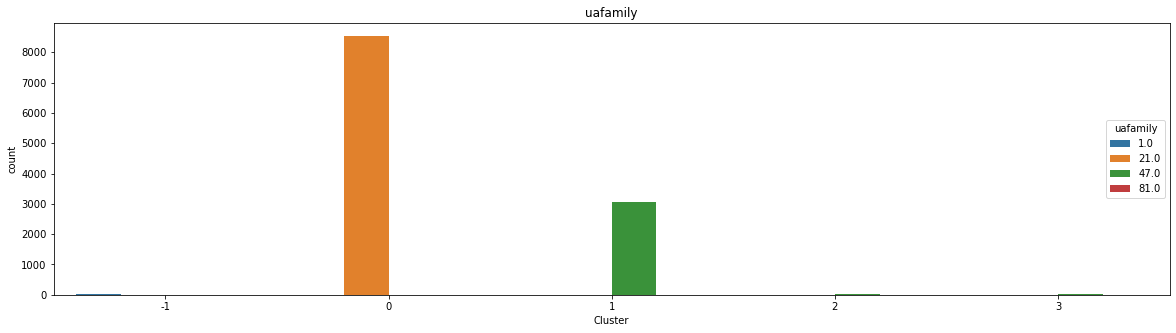

In [199]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="uafamily", data = lll1)
ax.set_title('uafamily')
ax.legend(loc='right', title="uafamily")
plt.show()

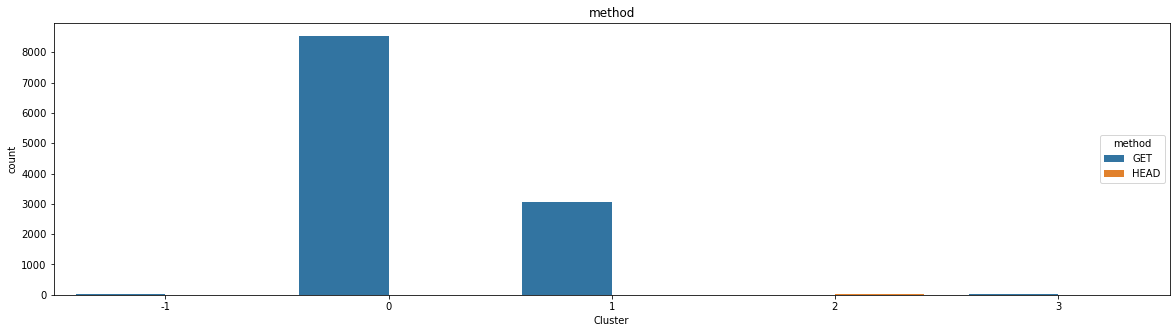

In [200]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="method", data = lll1)
ax.set_title('method')
ax.legend(loc='right', title="method")
plt.show()

In [95]:
df_website = df[df['host'] == 3]

In [96]:
df_website=df_website.drop(labels=["livechannel"],axis=1)

In [97]:
df_website=df_website.drop(labels=["cachecontrol"],axis=1)

In [98]:
df_website.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 76 to 286903
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   statuscode    1660 non-null   int64  
 1   contenttype   1660 non-null   object 
 2   uamajor       1377 non-null   float64
 3   uafamily      1660 non-null   float64
 4   devicefamily  1660 non-null   float64
 5   @timestamp    1660 non-null   object 
 6   host          1660 non-null   float64
 7   method        1660 non-null   object 
 8   cachename     1660 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 129.7+ KB


In [99]:
df_website=df_website.drop(labels=["devicefamily", "method", "cachename"],axis=1)

In [100]:
df_website=df_website.drop(labels=["host"],axis=1)

In [101]:
df_website.drop_duplicates(subset=None, keep='first', inplace=True)

In [102]:
df_website.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 76 to 286567
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   1160 non-null   int64  
 1   contenttype  1160 non-null   object 
 2   uamajor      1001 non-null   float64
 3   uafamily     1160 non-null   float64
 4   @timestamp   1160 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 54.4+ KB


In [103]:
df_jiiiiiiii = df_website['@timestamp']

In [104]:
from datetime import datetime
format_data = "%Y-%m-%dT%H:%M:%S.%fZ"
lh=[]
for i in df_jiiiiiiii:
    date = datetime.strptime(i, format_data)
    lh.append(date.hour)

In [105]:
df_website['hour'] = lh

In [106]:
df_website.head()

,statuscode,contenttype,uamajor,uafamily,@timestamp,hour
76,403,text/html,2.0,20.0,2088-05-13T08:27:58.000Z,8
623,403,text/html,15.0,11.0,2088-05-14T07:32:46.000Z,7
730,403,text/html,7.0,7.0,2088-05-14T08:42:36.000Z,8
743,403,text/html,NaN,1.0,2088-05-14T12:46:51.000Z,12
757,403,text/html,14.0,30.0,2088-05-14T14:37:40.000Z,14


In [107]:
df_website=df_website.drop(labels=["@timestamp"],axis=1)

In [108]:
bh1 = df_website.copy()

In [109]:
bh2 = df_website.copy()

In [110]:
bh2=bh2.drop(labels=["hour"],axis=1)

In [111]:
bh1.drop_duplicates(subset=None, keep='first', inplace=True)

In [112]:
bh2.drop_duplicates(subset=None, keep='first', inplace=True)

In [113]:
bh1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 76 to 284303
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   352 non-null    int64  
 1   contenttype  352 non-null    object 
 2   uamajor      317 non-null    float64
 3   uafamily     352 non-null    float64
 4   hour         352 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 16.5+ KB


In [114]:
bh2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 76 to 277045
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   65 non-null     int64  
 1   contenttype  65 non-null     object 
 2   uamajor      62 non-null     float64
 3   uafamily     65 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [115]:
bh1['uamajor']=bh1['uamajor'].fillna(bh1['uamajor'].mode()[0])
bh2['uamajor']=bh2['uamajor'].fillna(bh2['uamajor'].mode()[0])

In [116]:
gower_mat_444 = gower.gower_matrix(bh1)
gower_mat_555 = gower.gower_matrix(bh2)

In [117]:
dbscan_cluster = DBSCAN(eps=0.431, min_samples=12, metric="minkowski", p=2,metric_params={"w":np.ones(len(gower_mat_444))})
dbscan_cluster.fit(gower_mat_444)
labels=dbscan_cluster.labels_

In [119]:
dbscan_score = DBCV(gower_mat_111, labels)
print(dbscan_score)

0.49529734927796376


Text(0, 0.5, 'Distance')

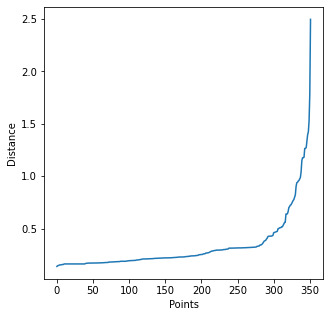

In [225]:
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(gower_mat_444)

distances, indices = neighbors.kneighbors(gower_mat_444)
distances = np.sort(distances[:,4], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.43116927


<Figure size 360x360 with 0 Axes>

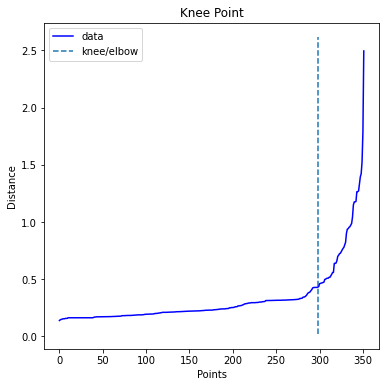

In [226]:
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [127]:
range_min = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 
for i in range_min:
    dbscan_cluster = DBSCAN(eps=0.431, min_samples=i, metric="minkowski", p=2,metric_params={"w":np.ones(len(gower_mat_444))})
    dbscan_cluster.fit(gower_mat_444)
    # Number of Clusters
    print('For minimum samples: %d' % i)
    labels=dbscan_cluster.labels_
    N_clus=len(set(labels))-(1 if -1 in labels else 0)
    print('Estimated no. of clusters: %d' % N_clus)
    # Identify Noise
    n_noise = list(dbscan_cluster.labels_).count(-1)
    print('Estimated no. of noise points: %d' % n_noise)

For minimum samples: 10
Estimated no. of clusters: 2
Estimated no. of noise points: 12
For minimum samples: 11
Estimated no. of clusters: 2
Estimated no. of noise points: 12
For minimum samples: 12
Estimated no. of clusters: 2
Estimated no. of noise points: 18
For minimum samples: 13
Estimated no. of clusters: 2
Estimated no. of noise points: 18
For minimum samples: 14
Estimated no. of clusters: 2
Estimated no. of noise points: 18
For minimum samples: 15
Estimated no. of clusters: 2
Estimated no. of noise points: 18
For minimum samples: 16
Estimated no. of clusters: 2
Estimated no. of noise points: 18
For minimum samples: 17
Estimated no. of clusters: 2
Estimated no. of noise points: 18
For minimum samples: 18
Estimated no. of clusters: 2
Estimated no. of noise points: 18
For minimum samples: 19
Estimated no. of clusters: 2
Estimated no. of noise points: 18
For minimum samples: 20
Estimated no. of clusters: 2
Estimated no. of noise points: 21


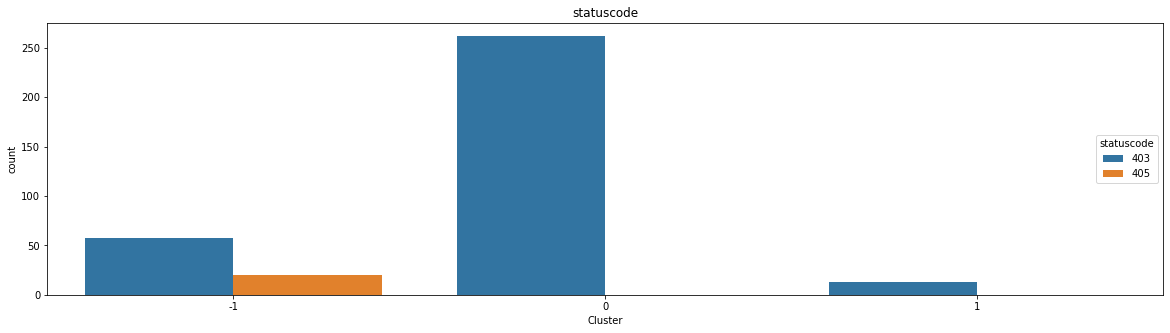

In [276]:
dbscan_cluster = DBSCAN(eps=0.431, min_samples=11, metric="minkowski", p=2,metric_params={"w":np.ones(len(gower_mat_444))})
dbscan_cluster.fit(gower_mat_444)
labels=dbscan_cluster.labels_
bh1["Cluster"] = labels
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="statuscode", data = bh1)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.show()

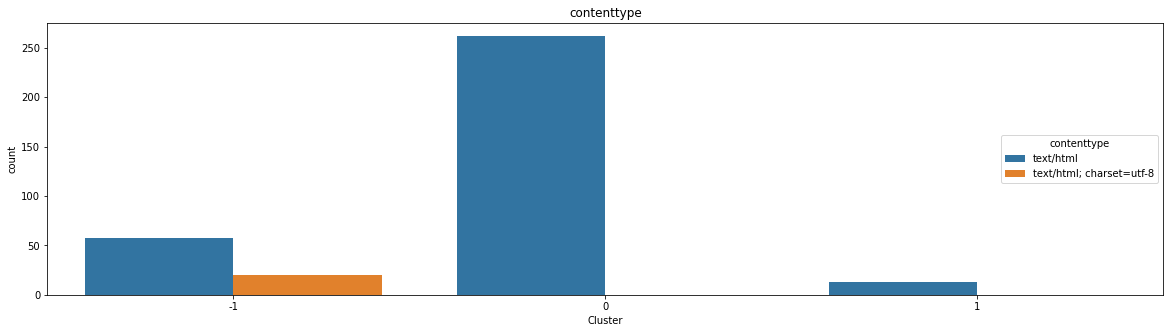

In [277]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="contenttype", data = bh1)
ax.set_title('contenttype')
ax.legend(loc='right', title="contenttype")
plt.show()

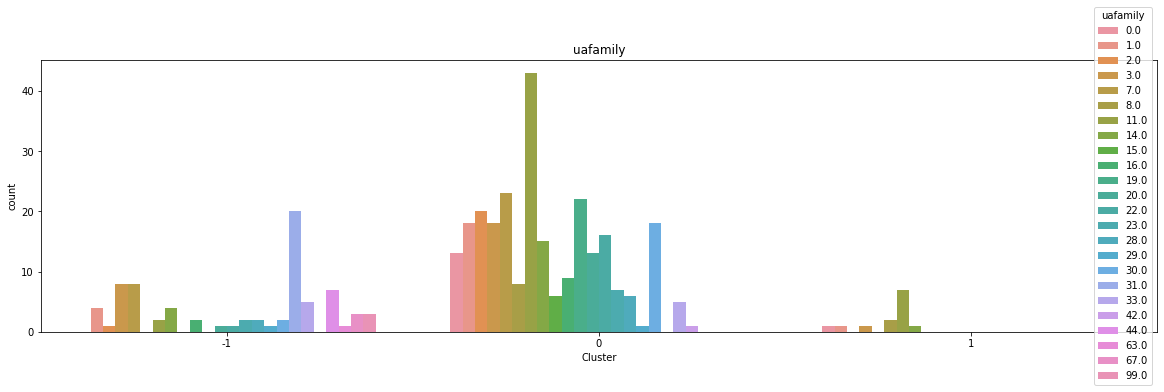

In [278]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="uafamily", data = bh1)
ax.set_title('uafamily')
ax.legend(loc='right', title="uafamily")
plt.show()

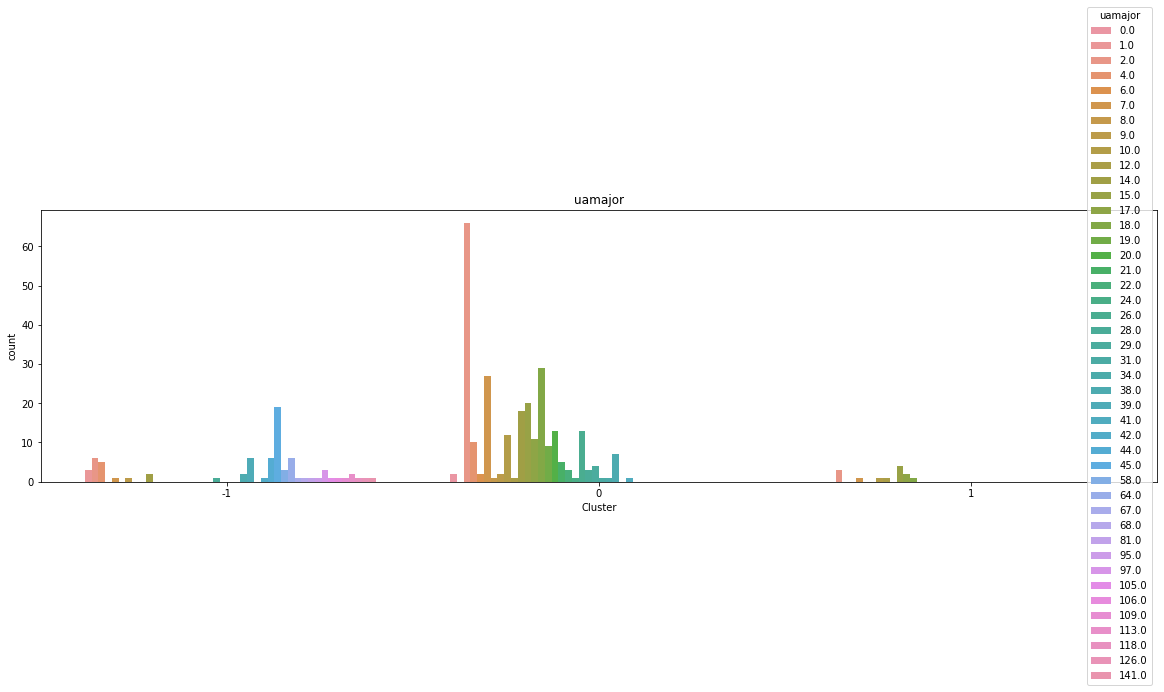

In [279]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='Cluster',hue="uamajor", data = bh1)
ax.set_title('uamajor')
ax.legend(loc='right', title="uamajor")
plt.show()

In [1]:
import numpy as np
from scipy.spatial.distance import euclidean, cdist
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.sparse import csgraph


def DBCV(X, labels, dist_function=euclidean):
    """
    Density Based clustering validation
    Args:
        X (np.ndarray): ndarray with dimensions [n_samples, n_features]
            data to check validity of clustering
        labels (np.array): clustering assignments for data X
        dist_dunction (func): function to determine distance between objects
            func args must be [np.array, np.array] where each array is a point
    Returns: cluster_validity (float)
        score in range[-1, 1] indicating validity of clustering assignments
    """
    graph = _mutual_reach_dist_graph(X, labels, dist_function)
    mst = _mutual_reach_dist_MST(graph)
    cluster_validity = _clustering_validity_index(mst, labels)
    return cluster_validity


def _core_dist(point, neighbors, dist_function):
    """
    Computes the core distance of a point.
    Core distance is the inverse density of an object.
    Args:
        point (np.array): array of dimensions (n_features,)
            point to compute core distance of
        neighbors (np.ndarray): array of dimensions (n_neighbors, n_features):
            array of all other points in object class
        dist_dunction (func): function to determine distance between objects
            func args must be [np.array, np.array] where each array is a point
    Returns: core_dist (float)
        inverse density of point
    """
    n_features = np.shape(point)[0]
    n_neighbors = np.shape(neighbors)[0]

    distance_vector = cdist(point.reshape(1, -1), neighbors)
    distance_vector = distance_vector[distance_vector != 0]
    numerator = ((1/distance_vector)**n_features).sum()
    core_dist = (numerator / (n_neighbors - 1)) ** (-1/n_features)
    return core_dist


def _mutual_reachability_dist(point_i, point_j, neighbors_i,
                              neighbors_j, dist_function):
    """.
    Computes the mutual reachability distance between points
    Args:
        point_i (np.array): array of dimensions (n_features,)
            point i to compare to point j
        point_j (np.array): array of dimensions (n_features,)
            point i to compare to point i
        neighbors_i (np.ndarray): array of dims (n_neighbors, n_features):
            array of all other points in object class of point i
        neighbors_j (np.ndarray): array of dims (n_neighbors, n_features):
            array of all other points in object class of point j
        dist_dunction (func): function to determine distance between objects
            func args must be [np.array, np.array] where each array is a point
    Returns: mutual_reachability (float)
        mutual reachability between points i and j
    """
    core_dist_i = _core_dist(point_i, neighbors_i, dist_function)
    core_dist_j = _core_dist(point_j, neighbors_j, dist_function)
    dist = dist_function(point_i, point_j)
    mutual_reachability = np.max([core_dist_i, core_dist_j, dist])
    return mutual_reachability


def _mutual_reach_dist_graph(X, labels, dist_function):
    """
    Computes the mutual reach distance complete graph.
    Graph of all pair-wise mutual reachability distances between points
    Args:
        X (np.ndarray): ndarray with dimensions [n_samples, n_features]
            data to check validity of clustering
        labels (np.array): clustering assignments for data X
        dist_dunction (func): function to determine distance between objects
            func args must be [np.array, np.array] where each array is a point
    Returns: graph (np.ndarray)
        array of dimensions (n_samples, n_samples)
        Graph of all pair-wise mutual reachability distances between points.
    """
    n_samples = np.shape(X)[0]
    graph = []
    counter = 0
    for row in range(n_samples):
        graph_row = []
        for col in range(n_samples):
            point_i = X[row]
            point_j = X[col]
            class_i = labels[row]
            class_j = labels[col]
            members_i = _get_label_members(X, labels, class_i)
            members_j = _get_label_members(X, labels, class_j)
            dist = _mutual_reachability_dist(point_i, point_j,
                                             members_i, members_j,
                                             dist_function)
            graph_row.append(dist)
        counter += 1
        graph.append(graph_row)
    graph = np.array(graph)
    return graph


def _mutual_reach_dist_MST(dist_tree):
    """
    Computes minimum spanning tree of the mutual reach distance complete graph
    Args:
        dist_tree (np.ndarray): array of dimensions (n_samples, n_samples)
            Graph of all pair-wise mutual reachability distances
            between points.
    Returns: minimum_spanning_tree (np.ndarray)
        array of dimensions (n_samples, n_samples)
        minimum spanning tree of all pair-wise mutual reachability
            distances between points.
    """
    mst = minimum_spanning_tree(dist_tree).toarray()
    return mst + np.transpose(mst)


def _cluster_density_sparseness(MST, labels, cluster):
    """
    Computes the cluster density sparseness, the minimum density
        within a cluster
    Args:
        MST (np.ndarray): minimum spanning tree of all pair-wise
            mutual reachability distances between points.
        labels (np.array): clustering assignments for data X
        cluster (int): cluster of interest
    Returns: cluster_density_sparseness (float)
        value corresponding to the minimum density within a cluster
    """
    indices = np.where(labels == cluster)[0]
    cluster_MST = MST[indices][:, indices]
    cluster_density_sparseness = np.max(cluster_MST)
    return cluster_density_sparseness


def _cluster_density_separation(MST, labels, cluster_i, cluster_j):
    """
    Computes the density separation between two clusters, the maximum
        density between clusters.
    Args:
        MST (np.ndarray): minimum spanning tree of all pair-wise
            mutual reachability distances between points.
        labels (np.array): clustering assignments for data X
        cluster_i (int): cluster i of interest
        cluster_j (int): cluster j of interest
    Returns: density_separation (float):
        value corresponding to the maximum density between clusters
    """
    indices_i = np.where(labels == cluster_i)[0]
    indices_j = np.where(labels == cluster_j)[0]
    shortest_paths = csgraph.dijkstra(MST, indices=indices_i)
    relevant_paths = shortest_paths[:, indices_j]
    density_separation = np.min(relevant_paths)
    return density_separation


def _cluster_validity_index(MST, labels, cluster):
    """
    Computes the validity of a cluster (validity of assignmnets)
    Args:
        MST (np.ndarray): minimum spanning tree of all pair-wise
            mutual reachability distances between points.
        labels (np.array): clustering assignments for data X
        cluster (int): cluster of interest
    Returns: cluster_validity (float)
        value corresponding to the validity of cluster assignments
    """
    min_density_separation = np.inf
    for cluster_j in np.unique(labels):
        if cluster_j != cluster:
            cluster_density_separation = _cluster_density_separation(MST,
                                                                     labels,
                                                                     cluster,
                                                                     cluster_j)
            if cluster_density_separation < min_density_separation:
                min_density_separation = cluster_density_separation
    cluster_density_sparseness = _cluster_density_sparseness(MST,
                                                             labels,
                                                             cluster)
    numerator = min_density_separation - cluster_density_sparseness
    denominator = np.max([min_density_separation, cluster_density_sparseness])
    cluster_validity = numerator / denominator
    return cluster_validity


def _clustering_validity_index(MST, labels):
    """
    Computes the validity of all clustering assignments for a
    clustering algorithm
    Args:
        MST (np.ndarray): minimum spanning tree of all pair-wise
            mutual reachability distances between points.
        labels (np.array): clustering assignments for data X
    Returns: validity_index (float):
        score in range[-1, 1] indicating validity of clustering assignments
    """
    n_samples = len(labels)
    validity_index = 0
    for label in np.unique(labels):
        fraction = np.sum(labels == label) / float(n_samples)
        cluster_validity = _cluster_validity_index(MST, labels, label)
        validity_index += fraction * cluster_validity
    return validity_index


def _get_label_members(X, labels, cluster):
    """
    Helper function to get samples of a specified cluster.
    Args:
        X (np.ndarray): ndarray with dimensions [n_samples, n_features]
            data to check validity of clustering
        labels (np.array): clustering assignments for data X
        cluster (int): cluster of interest
    Returns: members (np.ndarray)
        array of dimensions (n_samples, n_features) of samples of the
        specified cluster.
    """
    indices = np.where(labels == cluster)[0]
    members = X[indices]
    return members